## L2SS-Py Shapefile Subsetting

This notebook demonstates subsetting multiple data files by an existing shapefile.

Import Harmony Python library

In [10]:
from harmony import BBox, Client, Collection, Request
from harmony.config import Environment

Import libraries used to visualize l2ss-py result

In [11]:
import datetime as dt
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import earthaccess

import warnings
warnings.filterwarnings('ignore')

Create Harmony client. In this case, point the Harmony client at the `LOCAL` Harmony environment.

In [12]:
auth = earthaccess.login(strategy="interactive", persist=True)
harmony_client = Client(token=auth.token)

The example utilized in this demo uses a shapefile of the Gulf of Mexico. That shapefile ZIP file is in the local directory this notebook is running in.

In [14]:
shapefile_path = 'gulf_shapefile.zip' 
collection_id = 'C2075141605-POCLOUD'  # ASCATB-L2-Coastal

request = Request(
    collection=Collection(id=collection_id),
    shape=shapefile_path,
    granule_id=[
        'G2081656126-POCLOUD',
        'G2081939831-POCLOUD',
        'G2081745076-POCLOUD'
    ]
)

request.is_valid()

True

Wait for processing and then view the output

In [15]:
job_id = harmony_client.submit(request)
print(f'jobID = {job_id}')

print('\n Waiting for the job to finish. . .\n')
harmony_client.wait_for_processing(job_id, show_progress=True)
print("\n. . .DONE!")

jobID = dcd0d9f7-9400-4f5f-a4ee-e5ed9ffd0a12

 Waiting for the job to finish. . .



 [ Processing: 100% ] |###################################################| [|]



. . .DONE!


In [16]:
def display_wind_speed(nc_file_name):
    ds = xr.load_dataset(nc_file_name, engine='netcdf4')
    lats = ds.lat.values
    lons = ds.lon.values
    wind_speed_data = ds.wind_speed.values

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    # Zoom in to ~ north america
    ax.set_extent([-170, -20, 0, 40])
    ax.contourf(lons, lats, wind_speed_data)
    plt.show()

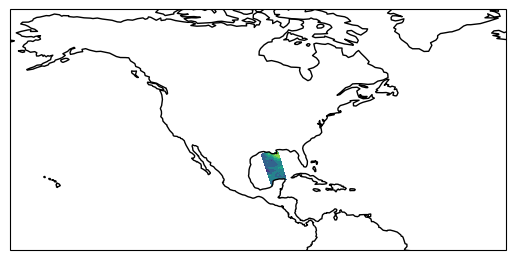

110447131_ascat_20121029_024201_metopb_00589_eps_o_coa_2101_ovw.l2_subsetted.nc


In [18]:
for filename in [f.result() for f in harmony_client.download_all(job_id)]:
    display_wind_speed(filename)
    print(filename)
    